# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_wind = city_json["wind"]["speed"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tvoroyri
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | uturoa
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | horta
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | kiunga
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | maracacume
Processing Record 19 of Set 1 | peace river
Processing Record 20 of Set 1 | jijiga
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | carnarvon
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tvoroyri,61.5556,-6.8111,11.67,97,94,6.68,FO,1691712983
1,edinburgh of the seven seas,-37.0676,-12.3116,12.09,73,64,13.35,SH,1691712984
2,bilibino,68.0546,166.4372,12.76,71,99,2.09,RU,1691712984
3,margaret river,-33.9500,115.0667,12.13,77,82,2.41,AU,1691712984
4,tiksi,71.6872,128.8694,18.98,41,6,5.18,RU,1691712984


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tvoroyri,61.5556,-6.8111,11.67,97,94,6.68,FO,1691712983
1,edinburgh of the seven seas,-37.0676,-12.3116,12.09,73,64,13.35,SH,1691712984
2,bilibino,68.0546,166.4372,12.76,71,99,2.09,RU,1691712984
3,margaret river,-33.9500,115.0667,12.13,77,82,2.41,AU,1691712984
4,tiksi,71.6872,128.8694,18.98,41,6,5.18,RU,1691712984


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

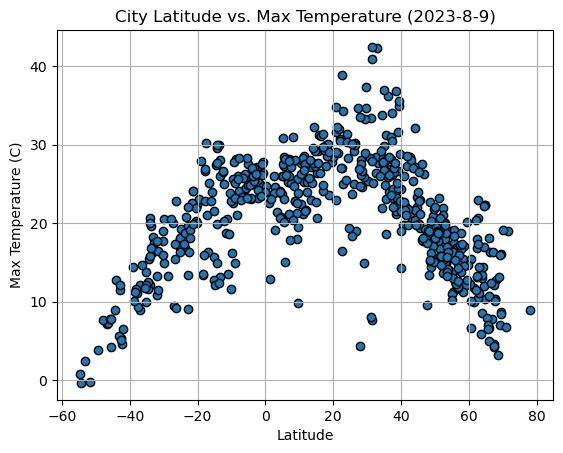

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black",)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-8-9)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
    
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

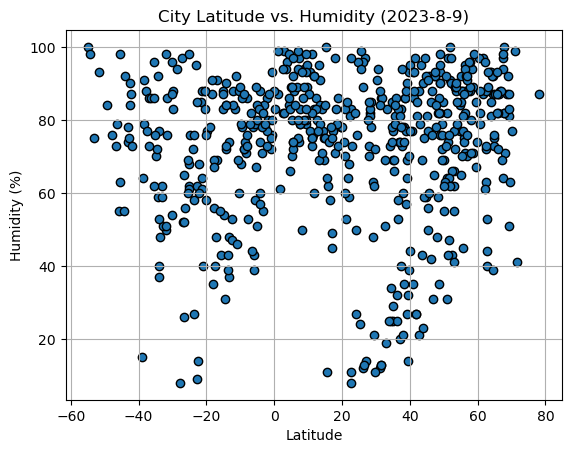

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black",)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-8-9)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

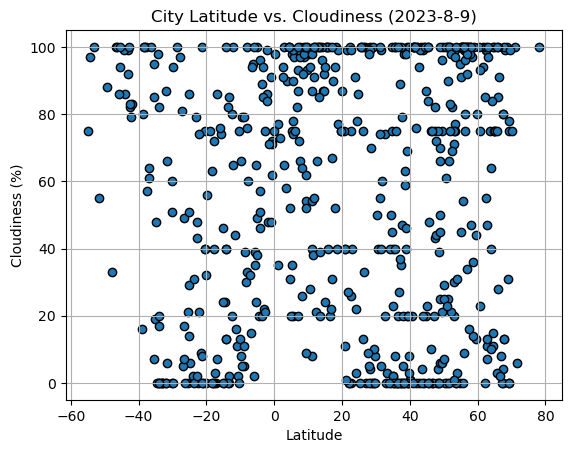

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black",)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-8-9)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

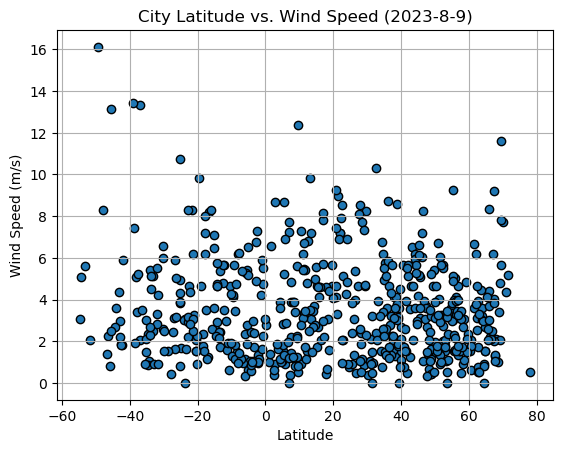

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black",)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-8-9)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
city_slope, city_int, city_r, city_p, city_std_err = stats.linregress(city_data_df)
city_fit = city_slope * city_data_df["Lat"] + city_int

NameError: name 'stats' is not defined

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tvoroyri,61.5556,-6.8111,11.67,97,94,6.68,FO,1691712983
2,bilibino,68.0546,166.4372,12.76,71,99,2.09,RU,1691712984
4,tiksi,71.6872,128.8694,18.98,41,6,5.18,RU,1691712984
8,hasaki,35.7333,140.8333,31.27,79,8,5.82,JP,1691712985
10,horta,38.5333,-28.6333,21.12,86,63,3.58,PT,1691712985


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,12.09,73,64,13.35,SH,1691712984
3,margaret river,-33.9500,115.0667,12.13,77,82,2.41,AU,1691712984
5,port-aux-francais,-49.3500,70.2167,3.84,84,88,16.12,TF,1691712984
6,uturoa,-16.7333,-151.4333,25.05,69,86,8.22,PF,1691712984
7,adamstown,-25.0660,-130.1015,17.94,62,14,10.76,PN,1691712985


###  Temperature vs. Latitude Linear Regression Plot

NameError: name 'city_fit' is not defined

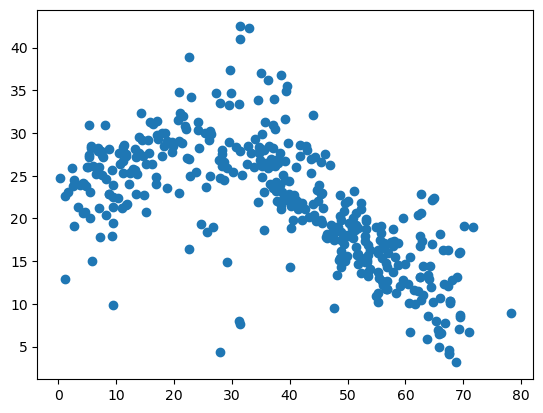

In [23]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], city_fit)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print("The r-value is: " & city_r)
plt.show()

The r-value is: 0.4121057168607245


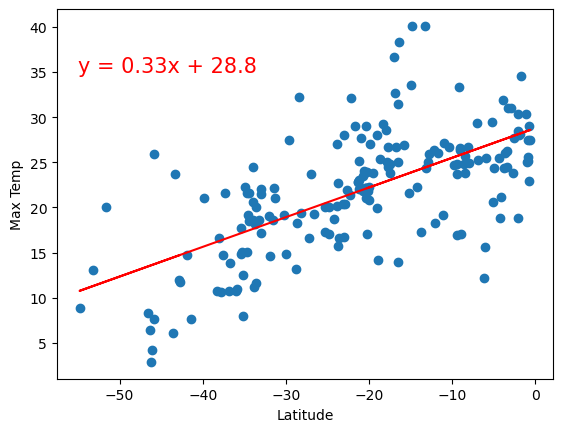

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


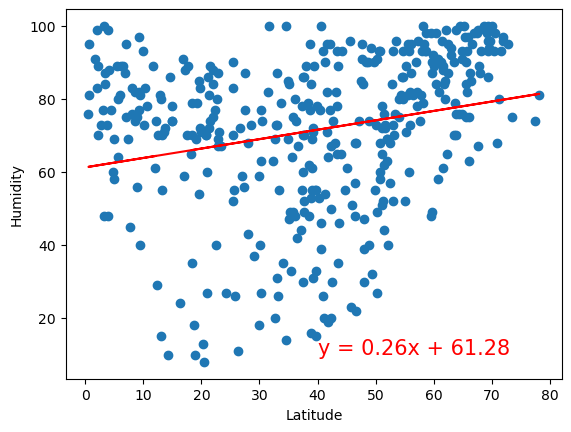

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


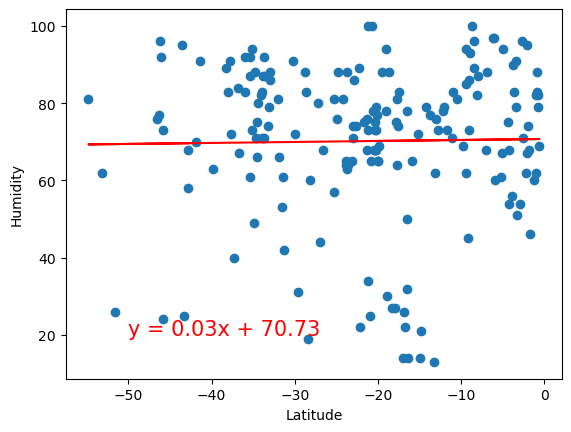

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


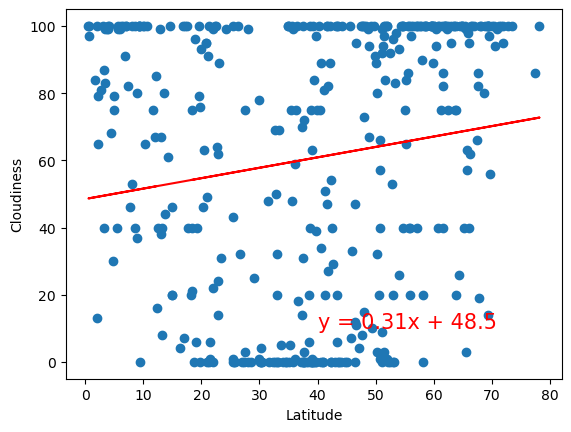

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


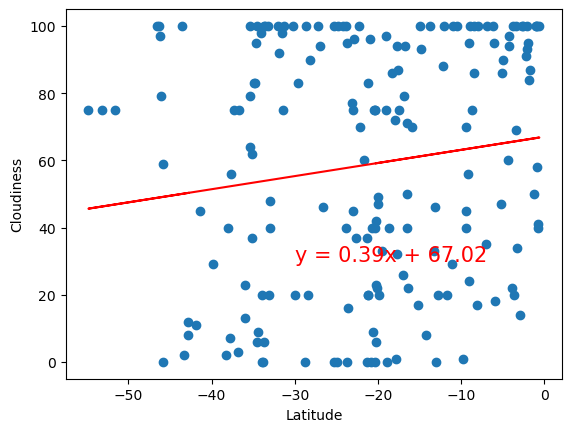

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


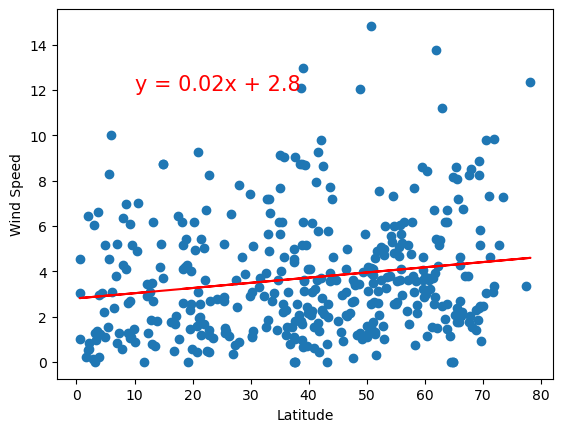

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


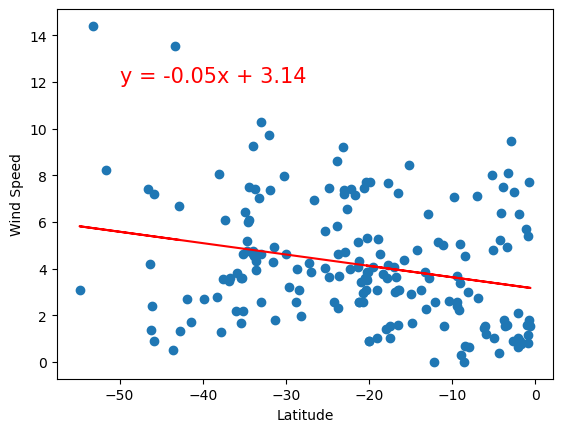

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE